# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions




Notes to self:

- breakdown data into two dataframes: military and mental health
- Consider additional notebook for splicing data into different dataframes


## Import Data

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

## Sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(3404, 77)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_thearmorylife.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.665676,-0.237877,-0.237877,0,1,...,1,0,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.573416,-0.263124,-0.263124,0,1,...,1,0,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.665676,-0.250500,-0.250500,0,1,...,1,0,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.167475,-0.225254,-0.225254,0,1,...,1,0,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.665676,-0.250500,-0.250500,0,1,...,1,0,0,0,0,0,0,0,22,5


In [3]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [5]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [6]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(df)

## Reviewing Aggregate Word Cloud

In [7]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

      _to_   ab  abandoned  abandonment  abilify   ability      able  abn  \
0      0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
1      0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
2      0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
3      0.0  0.0        0.0          0.0      0.0  0.000000  0.079688  0.0   
4      0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
...    ...  ...        ...          ...      ...       ...       ...  ...   
2718   0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
2719   0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
2720   0.0  0.0        0.0          0.0      0.0  0.000000  0.000000  0.0   
2721   0.0  0.0        0.0          0.0      0.0  0.055617  0.000000  0.0   
2722   0.0  0.0        0.0          0.0      0.0  0.097462  0.000000  0.0   

      abnormal  abroad  ...  younger  youtu  youtube   yr  yuma  zero  zomb

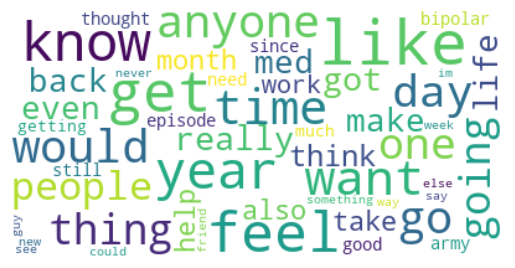

In [8]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [9]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

               precision    recall  f1-score   support

         Army       0.74      0.96      0.84       273
         USMC       0.74      0.22      0.34        92
      bipolar       0.85      0.88      0.87       190
schizophrenia       0.80      0.67      0.73       126

     accuracy                           0.78       681
    macro avg       0.78      0.68      0.69       681
 weighted avg       0.78      0.78      0.76       681



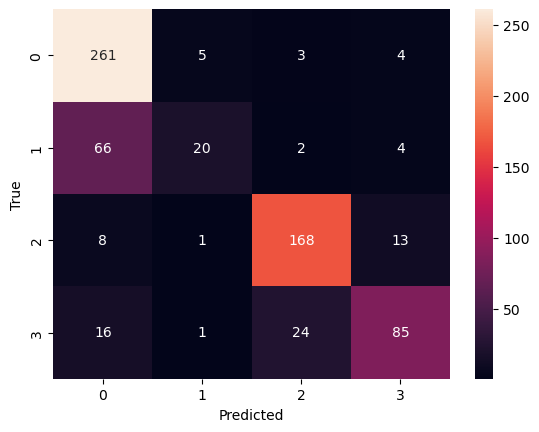

In [10]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_lr))

Best Parameters:  {'C': 10, 'solver': 'liblinear'}
               precision    recall  f1-score   support

         Army       0.79      0.89      0.84       273
         USMC       0.60      0.37      0.46        92
      bipolar       0.86      0.87      0.86       190
schizophrenia       0.76      0.73      0.74       126

     accuracy                           0.79       681
    macro avg       0.75      0.72      0.73       681
 weighted avg       0.78      0.79      0.78       681



In [12]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    class_coefficients = coefficients[_]
    sorted_indices = np.argsort(class_coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: Army
Top Positive Influential Words: ['ranger', 'pt', 'guard', 'leave', 'duty', 'ets', 'pay', 'hbl', 'airborne', 'basic', 'military', 'station', 'date', 'training', 'fort', 'unit', 'mo', 'ait', 'soldier', 'army']
Top Negative Influential Words: ['marine', 'feel', 'med', 'bipolar', 'episode', 'schizophrenia', 'sleep', 'think', 'like', 'symptom', 'voice', 'diagnosed', 'manic', 'feeling', 'else', 'mg', 'medication', 'mental', 'really', 'psychosis']

Class: USMC
Top Positive Influential Words: ['order', 'st', 'ea', 'cpl', 'personal', 'one', 'barrack', 'deployment', 'score', 'story', 'issued', 'got', 'base', 'semper', 'yall', 'duty', 'boot', 'usmc', 'corp', 'marine']
Top Negative Influential Words: ['feel', 'med', 'army', 'bipolar', 'people', 'episode', 'schizophrenia', 'time', 'help', 'know', 'friend', 'week', 'medication', 'family', 'soldier', 'ait', 'job', 'voice', 'right', 'trying']

Class: bipolar
Top Positive Influential Words: ['keep', 'disorder', 'relationship', 'diagnosed', 

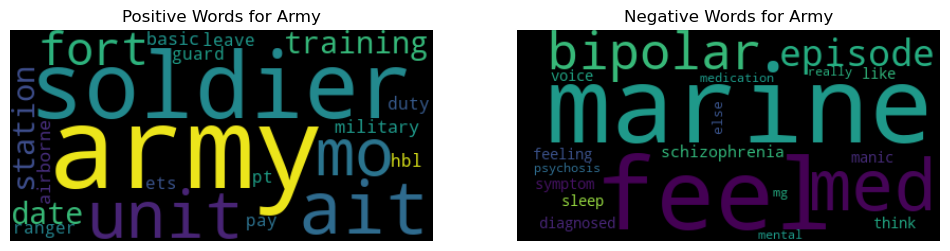

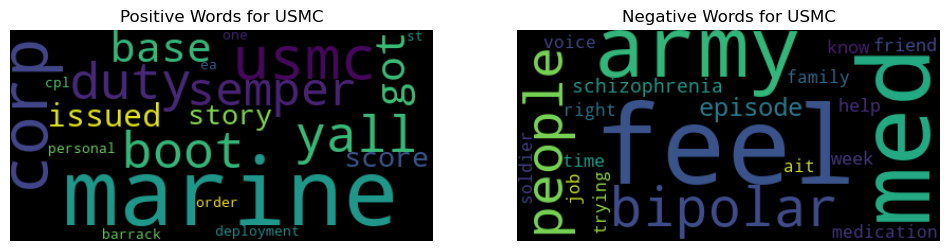

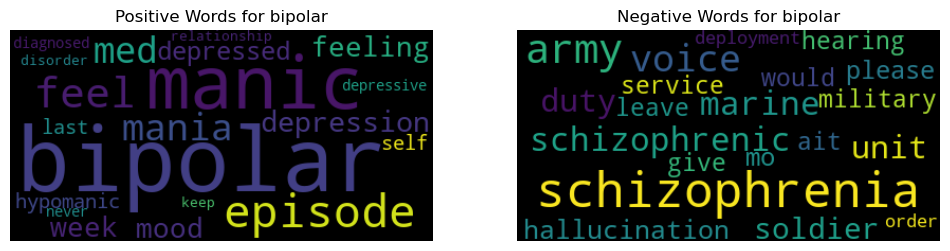

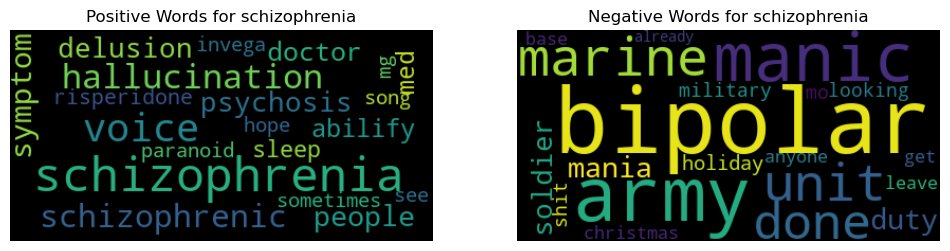

In [28]:
for index, class_label in enumerate(lrg.classes_):
    class_coefficients = coefficients[index]
    sorted_indices = np.argsort(class_coefficients)

    # Top 20 Positive and Negative Words with Coefficients
    top_positive_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[-20:]}
    top_negative_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[:20]}

    # Generate Word Clouds for Positive and Negative Words
    wordcloud_positive = WordCloud(mode= "RGBA").generate_from_frequencies(top_positive_words)
    wordcloud_negative = WordCloud(mode= "RGBA").generate_from_frequencies(top_negative_words)

    # Display Word Clouds
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title(f'Positive Words for {class_label}')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title(f'Negative Words for {class_label}')
    plt.axis("off")

    plt.show()

## Training for Naive Bayes Regression Model

In [14]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

               precision    recall  f1-score   support

         Army       0.73      0.95      0.83       273
         USMC       1.00      0.03      0.06        92
      bipolar       0.68      0.96      0.79       190
schizophrenia       0.87      0.37      0.51       126

     accuracy                           0.72       681
    macro avg       0.82      0.58      0.55       681
 weighted avg       0.78      0.72      0.66       681



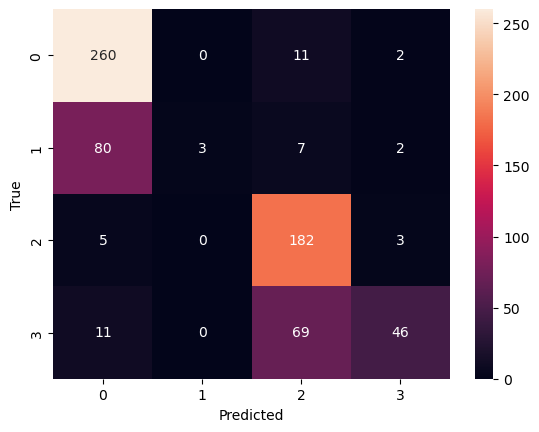

In [15]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Define a parameter grid for GridSearch
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
    }

# Initialize and perform the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate using the best model
best_model = grid_search.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_mnb))

Best Parameters:  {'alpha': 0.1}
               precision    recall  f1-score   support

         Army       0.78      0.93      0.85       273
         USMC       0.87      0.29      0.44        92
      bipolar       0.77      0.91      0.83       190
schizophrenia       0.79      0.64      0.71       126

     accuracy                           0.78       681
    macro avg       0.80      0.69      0.71       681
 weighted avg       0.79      0.78      0.76       681



In [17]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: Army
Top Influential Words: ['back', 'take', 'ait', 'day', 'got', 'mo', 'time', 'anyone', 'duty', 'soldier', 'unit', 'going', 'want', 'like', 'go', 'would', 'year', 'know', 'get', 'army']

Class: USMC
Top Influential Words: ['day', 'going', 'think', 'want', 'duty', 'good', 'work', 'back', 'year', 'know', 'guy', 'corp', 'go', 'would', 'anyone', 'one', 'like', 'get', 'got', 'marine']

Class: bipolar
Top Influential Words: ['one', 'depression', 'even', 'anyone', 'feeling', 'day', 'thing', 'life', 'really', 'want', 'manic', 'know', 'time', 'med', 'year', 'get', 'episode', 'bipolar', 'like', 'feel']

Class: schizophrenia
Top Influential Words: ['see', 'help', 'really', 'thought', 'symptom', 'hallucination', 'make', 'think', 'year', 'med', 'time', 'want', 'get', 'thing', 'voice', 'know', 'people', 'feel', 'schizophrenia', 'like']



## Training for Random Forest Classifier Model

In [18]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

         Army       0.74      0.94      0.83       273
         USMC       0.70      0.21      0.32        92
      bipolar       0.86      0.91      0.88       190
schizophrenia       0.84      0.72      0.78       126

     accuracy                           0.79       681
    macro avg       0.79      0.69      0.70       681
 weighted avg       0.79      0.79      0.77       681



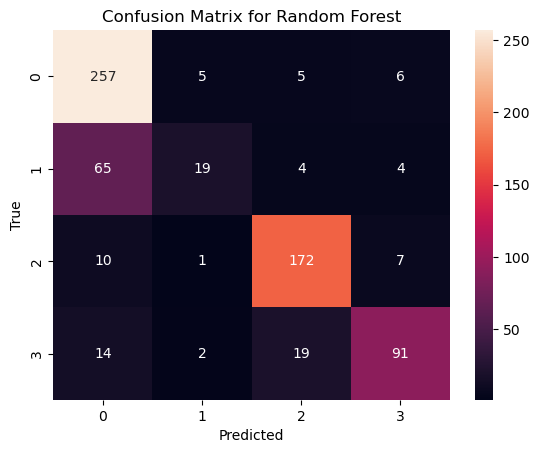

In [19]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
really: 0.004800906558332464
depression: 0.004924284643925083
soldier: 0.005124631649662591
medication: 0.005174773315419144
people: 0.005646311006304662
hallucination: 0.005710029924624826
mania: 0.006099256989853769
symptom: 0.006226793176902259
feeling: 0.006282469947550252
diagnosed: 0.006919842712705187
like: 0.008068891150125823
voice: 0.009558500832919068
med: 0.012022398403092634
manic: 0.012532430233328928
episode: 0.013612262131445058
marine: 0.014518005354206179
army: 0.015888664050587083
feel: 0.017221968129084875
schizophrenia: 0.021138449426474054
bipolar: 0.02530750757384954


## Training for KNN Model

In [21]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

               precision    recall  f1-score   support

         Army       0.41      1.00      0.58       273
         USMC       0.00      0.00      0.00        92
      bipolar       0.00      0.00      0.00       190
schizophrenia       0.60      0.02      0.05       126

     accuracy                           0.41       681
    macro avg       0.25      0.26      0.16       681
 weighted avg       0.27      0.41      0.24       681



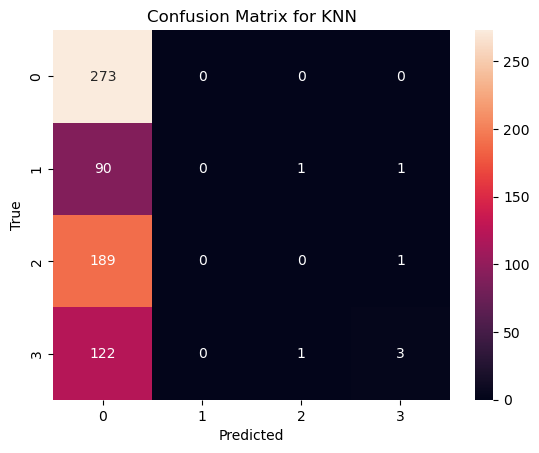

In [22]:
# Make predictions
y_pred_knn = knn.predict(X_test) #Results due to having more than 2 classes/ Considering breaking down into 2 classes

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()